## EDA

**Approach:**
- Overall stats
- Sleep
- Health conditions
- Age
- Income/working hours
- Night workers
- Naps 
    
**Initial Results**
- Participants average 6.7 hours of sleep per night (.3 below the recommended value)
- Participants are averaging more hours than what is considered a normal work week (45 vs 40).
- Amount of time spent working and acid reflux are the biggest causes of poor sleep.
- The most common awake times are between 6:00am and 6:15am. This is as expected.
- Aside from high blood pressure all percentages of observed health conditions are higher in those who are not getting adequate  sleep. The recurring trend is that heartburn is the worst offender, with an increase from 6% (for those getting < 7 hours of sleep) to 11% (for those getting > 7 hours of sleep).
- No correlation between age and amount of sleep.
- Participants making under 15,000 annually are more likely to have health conditions and poor sleep. They are also more likely to be treated for depression, anxiety and diabetes.

**Outliers:**  
- A few participants average under 3 hours of sleep per night. 

**Impuation**
- Non-answers (refused/don't know) were imputed with either the mean or the mode. 
- length_of_naps had nans as those participants did not take naps. This were given a value of 0.  

**Next steps:**
- Based on the EDA, sleep-based features should be able predict presence of a health condition.

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv('./datasets/sleep_EDA.csv', index_col = [0])

## Preliminary Stats

In [3]:
df.describe().columns

Index(['usual_sleep_per_night', 'naps_per_month', 'length_of_average_nap',
       'employment_status', 'avg_weekly_hours_worked',
       'treated_for_heart_disease', 'treated_for_high_blood_pressure',
       'treated_for_diabetes', 'treated_for_heartburn_GERD',
       'treated_for_arthritis', 'treated_for_depression',
       'treated_for_anxiety', 'age', 'unconvential_awake_time', 'poor_sleep',
       'has_condition'],
      dtype='object')

**Percentage of observations treated for specific health conditions:**
- Heart Disease: 5.3%
- High Blood Pressure: 2.1%
- Diabetes: 6.7%
- Heartburn/GERD: 8.5%
- Arthritis: 7.8%
- Depression: 6.8%
- Anxiety: 4.5%

**Ages**

- Ages range from 18 to 91 with the majority being 40+

**Amount of Sleep**

- Participants average 6.7 hours of sleep per night (.3 below the recommended value).

**Work**

- Participants are averaging more hours than what is considered a normal work week (45 vs 40).

## Sleep

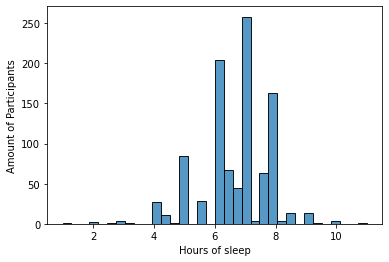

In [4]:
sns.histplot(df.usual_sleep_per_night)

plt.ylabel('Amount of Participants')
plt.xlabel('Hours of sleep');

Average sleep hours among participants follows a normal distribution with most averaging between the 6- and 8-hour range.

**Awake Times**

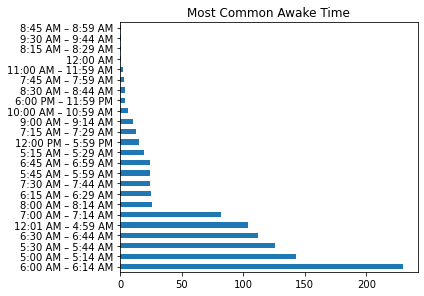

In [5]:
# Most common awake times for those with each health condition
df['awake_time'].value_counts().plot(kind = 'barh')
plt.tight_layout()
plt.title('Most Common Awake Time');

- The most common awake times are between 6:00am and 6:15am. This is as expected.

**Correlations between numerical features and having poor sleep**

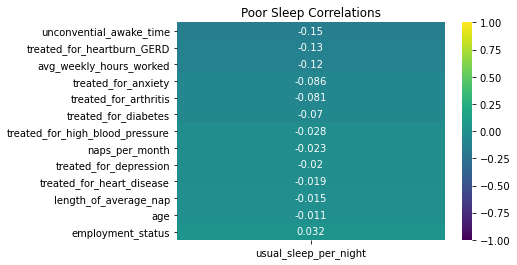

In [6]:
sns.heatmap(df.drop(columns = 'poor_sleep').corr()[['usual_sleep_per_night']][1:-1].sort_values('usual_sleep_per_night', ascending = True),
                                                  vmin = -1, 
                                                  vmax = 1, 
                                                  annot = True,
                                                  cmap = 'viridis')
plt.title('Poor Sleep Correlations');

- Heartburn and work hours per week have the strongest postive correalation with poor sleep. 

**Naps**

In [7]:
df[df['naps_per_month'] != 0].shape

(559, 26)

60% percent of participants take more than one nap per month.

<Figure size 432x288 with 0 Axes>

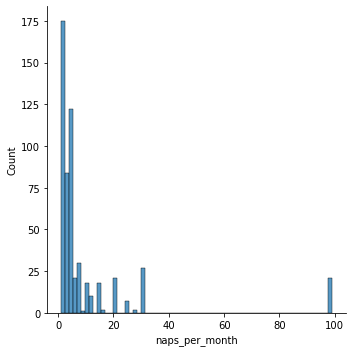

In [8]:
plt.figure()
sns.displot(df[df['naps_per_month'] != 0]['naps_per_month']);

Participants that nap do so for about an hour. There is one individual who naps over 25 times per month. 

## Health Conditions

**Health Conditions of participants**

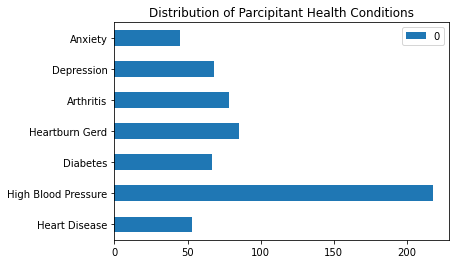

In [9]:
treated = [x for x in df.columns if x[:7] == 'treated']
treated_sums = [df[x].sum() for x in df[treated].columns]
hc_counts = pd.DataFrame(treated_sums, index = [x[12:].title().replace('_', ' ') for x in treated]);
hc_counts.plot(kind = 'barh', title = 'Distribution of Parcipitant Health Conditions');

Our participants suffered the most from High Blood Pressure. 

**Percentages of health conditions by whether or not the participant is getting adequate sleep**

In [10]:
df.drop(columns = ['age', 
                   'usual_sleep_per_night',
                   'employment_status',
                   'avg_weekly_hours_worked',
                   'naps_per_month',
                   'has_condition',
                   'length_of_average_nap']).groupby('poor_sleep').mean().T

poor_sleep,0,1
treated_for_heart_disease,0.049618,0.056723
treated_for_high_blood_pressure,0.221374,0.214286
treated_for_diabetes,0.059160,0.075630
treated_for_heartburn_GERD,0.059160,0.113445
treated_for_arthritis,0.061069,0.096639
treated_for_depression,0.062977,0.073529
treated_for_anxiety,0.032443,0.058824
unconvential_awake_time,0.085878,0.197479


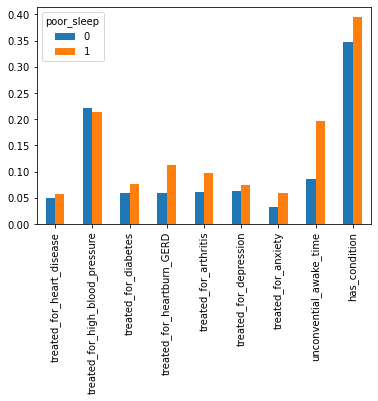

In [11]:
df.drop(columns = ['age',
                   'naps_per_month',
                   'length_of_average_nap',
                   'usual_sleep_per_night',
                   'employment_status',
                   'avg_weekly_hours_worked']).groupby('poor_sleep').mean().T.plot(kind='bar');

- Aside from high blood pressure, all percentages observed that health conditions are higher in those who are not getting adequate sleep. The recurring trend is that heartburn is the worst offender, with an increase from 6% (for those getting < 7 hours of sleep) to 11% (for those getting > 7 hours of sleep).

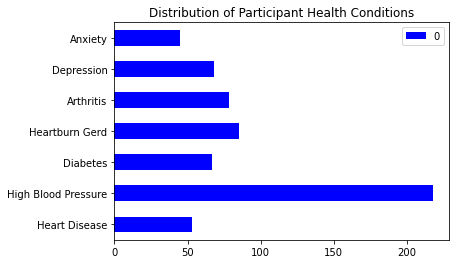

In [12]:
# Average amount of sleep for those with each health condition.
treated = [x for x in df.columns if x[:7] == 'treated']
treated_sums = [df[x].sum() for x in df[treated].columns]
hc_counts = pd.DataFrame(treated_sums, index = [x[12:].title().replace('_', ' ') for x in treated]);
hc_counts.plot(kind = 'barh', title = 'Distribution of Participant Health Conditions', color = ['blue',
                                                                                              'green',
                                                                                              'yellow',
                                                                                              'red',
                                                                                              'pink',
                                                                                              'orange']);


## Night Owls

In [13]:
df['start_work'].value_counts()

8:00 AM – 8:14 AM      216
7:00 AM – 7:14 AM      158
7:30 AM – 7:44 AM      132
8:30 AM – 8:44 AM       79
9:00 AM – 9:14 AM       73
6:00 AM – 6:14 AM       70
6:30 AM – 6:44 AM       59
12:00 PM – 5:59 PM      31
7:45 AM – 7:59 AM       23
10:00 AM – 10:59 AM     22
12:01 AM – 4:59 AM      19
6:00 PM – 11:59 PM      17
9:30 AM – 9:44 AM       16
5:30 AM – 5:44 AM       13
7:15 AM – 7:29 AM       12
8:15 AM – 8:29 AM       11
5:00 AM – 5:14 AM       10
8:45 AM – 8:59 AM        8
11:00 AM – 11:59 AM      6
6:45 AM – 6:59 AM        6
6:15 AM – 6:29 AM        5
9:15 AM – 9:29 AM        5
12:00 AM                 3
5:45 AM – 5:59 AM        3
5:15 AM – 5:29 AM        2
9:45 AM – 9:59 AM        1
Name: start_work, dtype: int64

In [14]:
owl = df[df['start_work'].str.contains('PM')] + df[df['start_work'].str.contains('12:00 AM')]

In [15]:
earlybird = df[df['start_work'].str.contains('AM')]

In [16]:
earlybird.describe()

,usual_sleep_per_night,naps_per_month,length_of_average_nap,employment_status,avg_weekly_hours_worked,treated_for_heart_disease,treated_for_high_blood_pressure,treated_for_diabetes,treated_for_heartburn_GERD,treated_for_arthritis,treated_for_depression,treated_for_anxiety,age,unconvential_awake_time,poor_sleep,has_condition
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,6.678138,5.414916,31.005252,2.000000,45.038866,0.051471,0.217437,0.066176,0.082983,0.073529,0.069328,0.047269,47.263042,0.127101,0.466387,0.366597
std,1.136658,14.977976,42.404677,0.366872,10.321721,0.221072,0.412719,0.248721,0.276002,0.261141,0.254144,0.212325,11.635145,0.333261,0.499131,0.482128
min,1.000000,0.000000,0.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000
50%,7.000000,1.000000,15.000000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000
75%,7.500000,4.000000,60.000000,2.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,0.000000,1.000000,1.000000
max,11.000000,99.000000,360.000000,3.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000,1.000000,1.000000,1.000000


- People who work night/evening shifts are getting worse sleep than the average. (6.1 hrs vs 6.7)
- 44% have health conditions (vs 37% in those with morning start times)

## Age

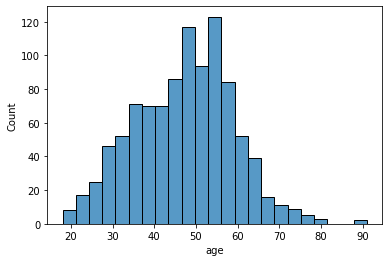

In [17]:
sns.histplot(df['age']);

- Participants are mainly between their 40s and 60s

- People older than 30 are getting the same amount of sleep per night as those in their 20s. My assumption would be that one group would be higher than the other due to either partying or work.

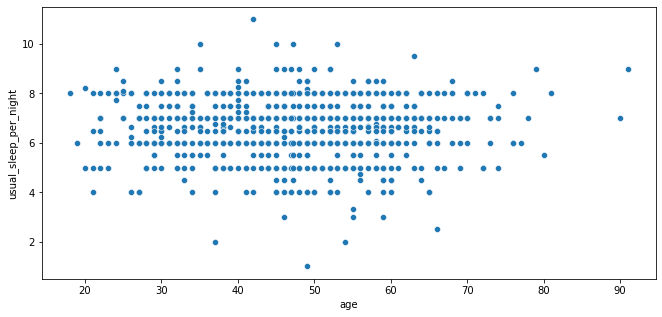

In [18]:
plt.figure(figsize = (11, 5))
sns.scatterplot(x=df['age'], y=df['usual_sleep_per_night']);

- There does not seem to be much correlation between age and usual amount of sleep.

## Income

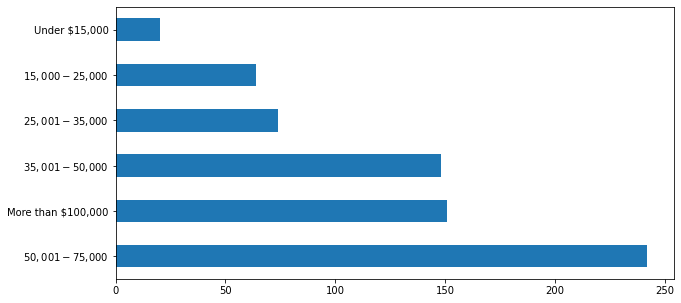

In [19]:
plt.figure(figsize = (10,5))
df['house_hold_income_bracket'].value_counts().plot(kind = 'barh');

<Figure size 1440x1152 with 0 Axes>

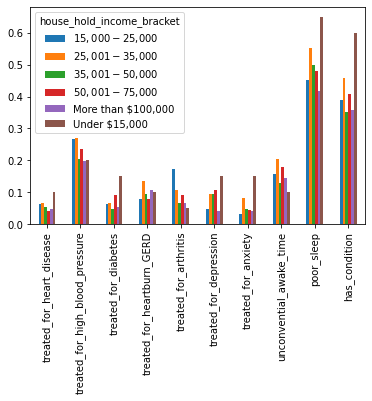

In [20]:
plt.figure(figsize = (20,16))
df.drop(columns = ['length_of_average_nap',
                   'naps_per_month', 'age', 
                   'usual_sleep_per_night',
                   'employment_status',
                   'avg_weekly_hours_worked']).groupby('house_hold_income_bracket').mean().T.plot(kind='bar');

Participants who make under $15,000 are more likely to have a health condition and also far more likely to be getting poor sleep. They are also more likely to be treated for depression, anxiety and diabetes. 